# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [12]:
df_clean= pd.read_csv("AviationData_Cleaned.csv",low_memory=False)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90256 entries, 0 to 90255
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88797 non-null  object 
 1   Investigation.Type      90256 non-null  object 
 2   Accident.Number         90247 non-null  object 
 3   Event.Date              90256 non-null  object 
 4   Location                90204 non-null  object 
 5   Country                 90031 non-null  object 
 6   Airport.Code            51679 non-null  object 
 7   Airport.Name            52754 non-null  object 
 8   Injury.Severity         87817 non-null  object 
 9   Aircraft.damage         85623 non-null  object 
 10  Aircraft.Category       88797 non-null  object 
 11  Registration.Number     87518 non-null  object 
 12  Make                    88751 non-null  object 
 13  Model                   88797 non-null  object 
 14  Amateur.Built           88797 non-null

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [9]:
# Separate airplanes by size
small_planes = df_clean[df_clean["Total_Passengers"] < 20]
large_planes = df_clean[df_clean["Total_Passengers"] >= 20]

print("Small airplanes:", small_planes.shape)
print("Large airplanes:", large_planes.shape)

Small airplanes: (83296, 31)
Large airplanes: (2770, 31)


In [16]:
#Compute Safety Metrics, For both groups we’ll calculate: 
#Average Fatal + Serious Injury Rate (fraction of passengers)
#Fraction of accidents with destroyed aircraft
#Total number of accidents
# def function
def compute_safety_metrics(df):
    return pd.DataFrame({
        "Accident_Count": [len(df)],
        "Avg_Fatal_Serious_Rate": [df["Fatal_Serious_Fraction"].mean()],
        "Aircraft_Destroyed_Rate": [df["Destroyed"].mean()]
    })


small_metrics = compute_safety_metrics(small_planes)
large_metrics = compute_safety_metrics(large_planes)

print("Small Airplanes Metrics:\n", small_metrics)
print("\nLarge Airplanes Metrics:\n", large_metrics)

Small Airplanes Metrics:
    Accident_Count  Avg_Fatal_Serious_Rate  Aircraft_Destroyed_Rate
0           83296                0.297643                 0.218222

Large Airplanes Metrics:
    Accident_Count  Avg_Fatal_Serious_Rate  Aircraft_Destroyed_Rate
0            2770                0.067908                 0.075451


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [18]:
# For small airplanes
small_risk = ( small_planes.groupby("Make").agg
              (
        Mean_Fatal_Serious=("Fatal_Serious_Fraction", "mean"),
        Count=("Make", "size")
    )
    .query("Count >= 10")  # drop makes with too few accidents for stability
    .sort_values("Mean_Fatal_Serious")
    .head(15)
)

# For large airplanes
large_risk = (
    large_planes.groupby("Make")
    .agg(
        Mean_Fatal_Serious=("Fatal_Serious_Fraction", "mean"),
        Count=("Make", "size")
    )
    .query("Count >= 10")
    .sort_values("Mean_Fatal_Serious")
    .head(15)
)

print("Safest 15 Makes (Small Airplanes):\n", small_risk)
print("\nSafest 15 Makes (Large Airplanes):\n", large_risk)

Safest 15 Makes (Small Airplanes):
                              Mean_Fatal_Serious  Count
Make                                                  
PIAGGIO                                0.000000     10
CUB CRAFTERS INC                       0.058824     17
AMERICAN LEGEND AIRCRAFT CO            0.062500     16
SNOW                                   0.090909     33
AIRBUS INDUSTRIE                       0.092308     13
WACO                                   0.095745    141
MEYERS AIRCRAFT CO.                    0.100000     10
WILLIAMS                               0.100000     10
AVID AIRCRAFT                          0.100000     10
BOMBARDIER INC                         0.100000     10
EVEKTOR-AEROTECHNIK AS                 0.103448     29
GRUMMAN-SCHWEIZER                      0.112434    126
ULTRAMAGIC                             0.112587     13
DASSAULT-BREGUET                       0.119048     21
BOMBARDIER                             0.131319     21

Safest 15 Makes (Large Airpl

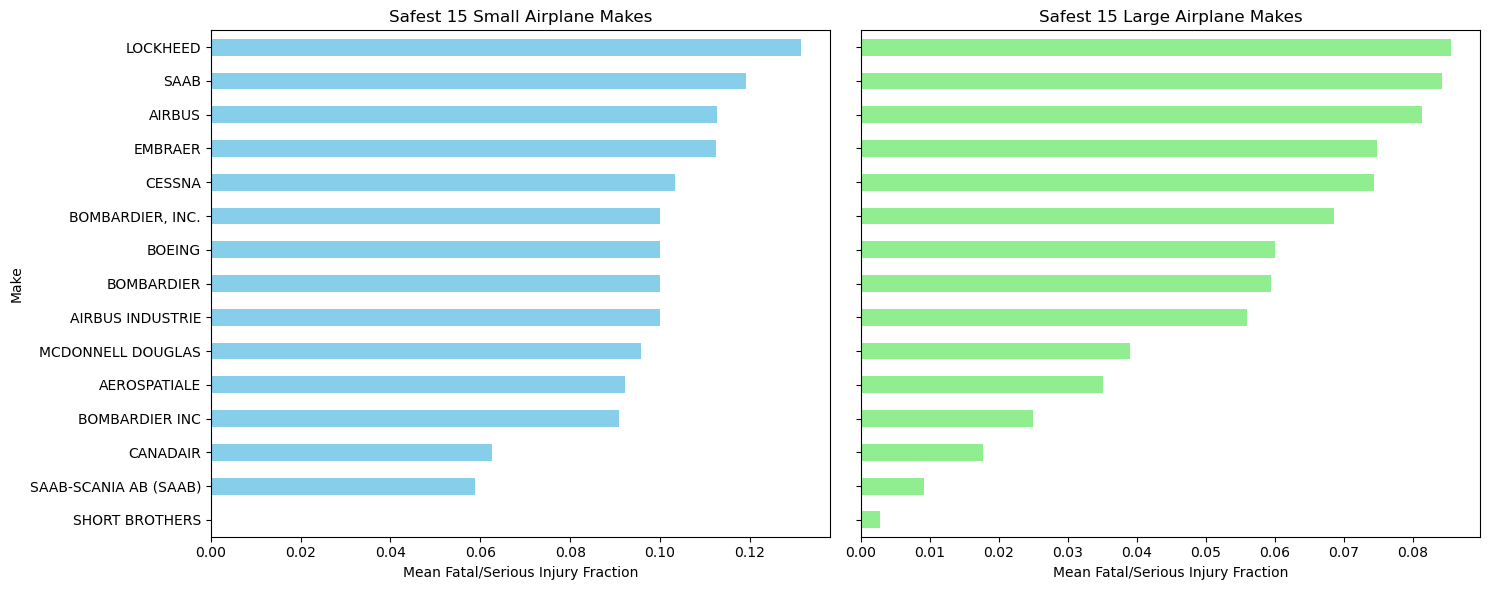

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Small Airplanes
small_risk["Mean_Fatal_Serious"].plot(kind="barh", ax=ax[0], color="skyblue")
ax[0].set_title("Safest 15 Small Airplane Makes")
ax[0].set_xlabel("Mean Fatal/Serious Injury Fraction")

# Large Airplanes
large_risk["Mean_Fatal_Serious"].plot(kind="barh", ax=ax[1], color="lightgreen")
ax[1].set_title("Safest 15 Large Airplane Makes")
ax[1].set_xlabel("Mean Fatal/Serious Injury Fraction")

plt.tight_layout()
plt.show()

Small airplanes → Safest makes are those with the lowest average fraction of passengers seriously/fatally injured per crash.

Large airplanes → Similarly analyzed, showing which manufacturers have historically had safer outcomes in accidents.

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [33]:
# Find the 10 makes with lowest mean serious/fatal injury rates (small airplanes)
top10_small_makes = (
    small_planes.groupby("Make")["Fatal_Serious_Fraction"]
    .mean()
    .nsmallest(10)
    .index
)


# Filter dataset to just those makes
small_top10 = small_planes[small_planes["Make"].isin(top10_small_makes)]
print(small_top10)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
25585  20001212X23056           Accident      ATL90DKJ04  1990-05-27   
30467  20001211X14611           Accident      CHI92DCG02  1992-05-30   
35889  20001206X01975           Accident      BFO94LA152  1994-08-27   
50517  20010518X00962           Accident      DEN01LA097  2001-05-12   
53794  20021125X05521           Accident      CHI03LA026  2002-11-19   
56595  20040510X00581           Accident      SEA04LA080  2004-05-09   
64401  20080611X00834           Incident      DFW08IA126  2008-05-01   
89584     2.02208E+13           Accident      ANC22LA064  2022-07-27   
89973      2.0221E+13           Accident      WPR23LA005  2022-10-01   
89993      2.0221E+13           Accident      WPR23LA020  2022-10-04   

              Location        Country Airport.Code          Airport.Name  \
25585   TUSCALOOSA, AL  United States          NaN                   NaN   
30467     MARSHALL, MO  United States          MHL     

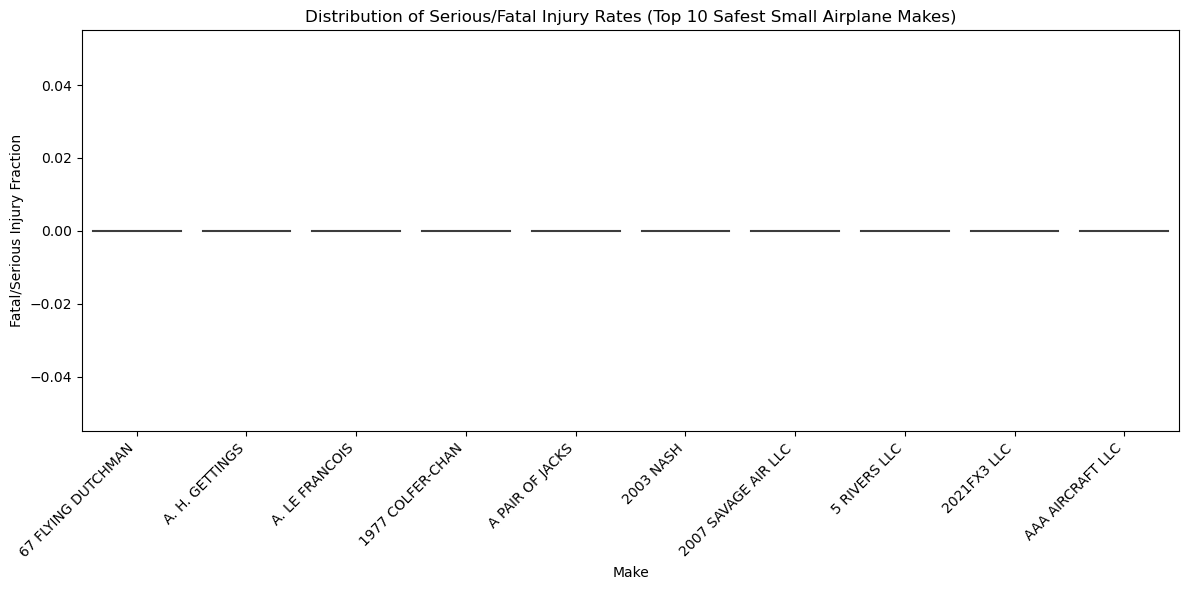

In [34]:
# Violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=small_top10,
    x="Make",
    y="Fatal_Serious_Fraction",
    inner="box",   # shows boxplot inside violins for clarity
    scale="width"
)

plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Serious/Fatal Injury Rates (Top 10 Safest Small Airplane Makes)")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.xlabel("Make")
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.